# **<<< Only Problem 1 and 2 will be graded >>>**

## Problem 1 (sound)
Denoising time with FFT (DFT)

In [1]:
# !pip install praat-parselmouth

In [2]:
import numpy as np
import pandas as pd
from scipy import signal,fftpack
import cv2
from skimage.io import imread
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import IPython.display as ipd
import os

import librosa
import parselmouth

In [3]:
sampling_rate = 32000
N=10001
Nf = 3 # Nf--> num freq
t= np.arange(N,dtype=float)
# pick rand period betwwen 10-2010 and convert to freq

# random period
Ts = np.random.rand(Nf)*2000+10
fs=1/Ts

# fs in sampling rate = 32000
fs_real = fs*sampling_rate

# pick rand Amp and phase
amp = np.random.rand(Nf)*200+ 100
phi = np.random.rand(Nf)*2*np.pi

# create clean signal
h = np.zeros(N)
for i in range(len(fs)):
    h += amp[i]*np.sin(2*np.pi*fs[i]*t + phi[i])

# signal with noise
h_w_noise = h + np.random.randn(N)*3*h + np.random.randn(N)*700

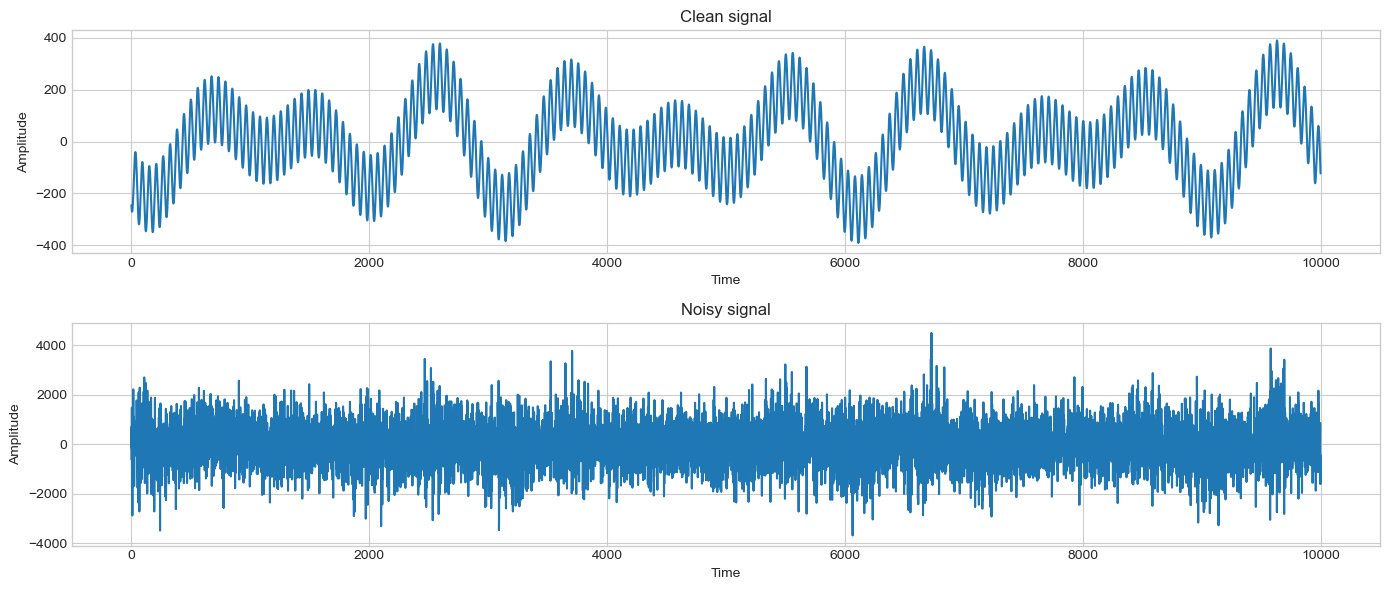

In [4]:
# TODO 1.1 : plot (1) clean signal and (2) noisy signal with label

plt.figure(figsize=(14,6))

# Clean signal
plt.subplot(2, 1, 1)
plt.plot(t, h)
plt.title('Clean signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

# Noisy signal
plt.subplot(2, 1, 2)
plt.plot(t, h_w_noise)
plt.title('Noisy signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

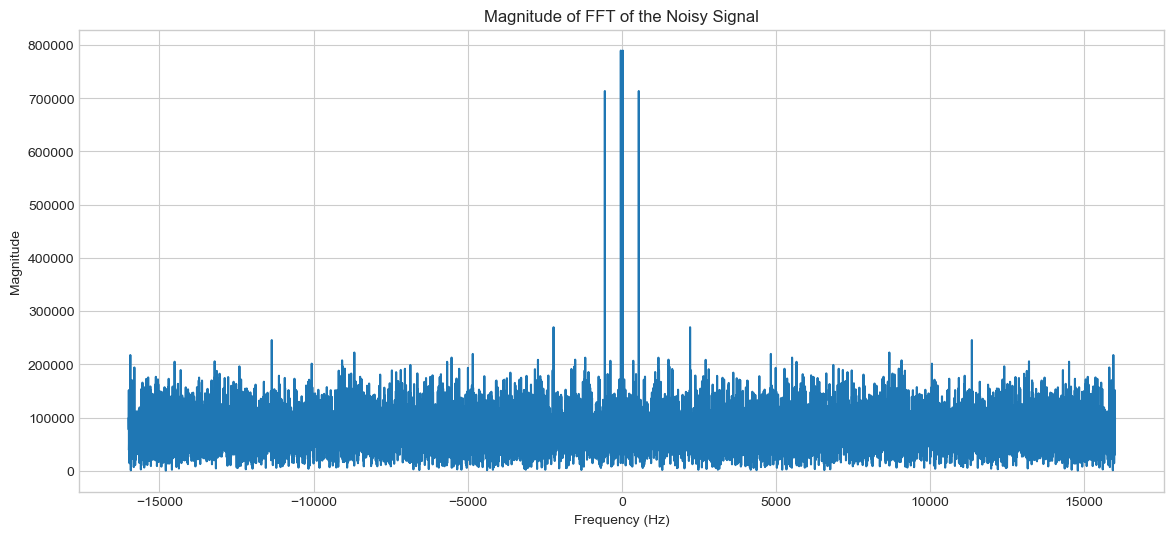

In [5]:
# TODO 1.2: plot magnitude of FFT of the noisy signal (freq sort form min--> max)

# Compute the FFT of the noisy signal
H_w_noise_fft = np.fft.fft(h_w_noise)
magnitude = np.abs(H_w_noise_fft)

frequencies = np.fft.fftfreq(N, d=1/sampling_rate)
sorted_indices = np.argsort(frequencies)

sorted_frequencies = frequencies[sorted_indices]
sorted_magnitude = magnitude[sorted_indices]

# Plot
plt.figure(figsize=(14, 6))
plt.plot(sorted_frequencies, sorted_magnitude)
plt.title('Magnitude of FFT of the Noisy Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


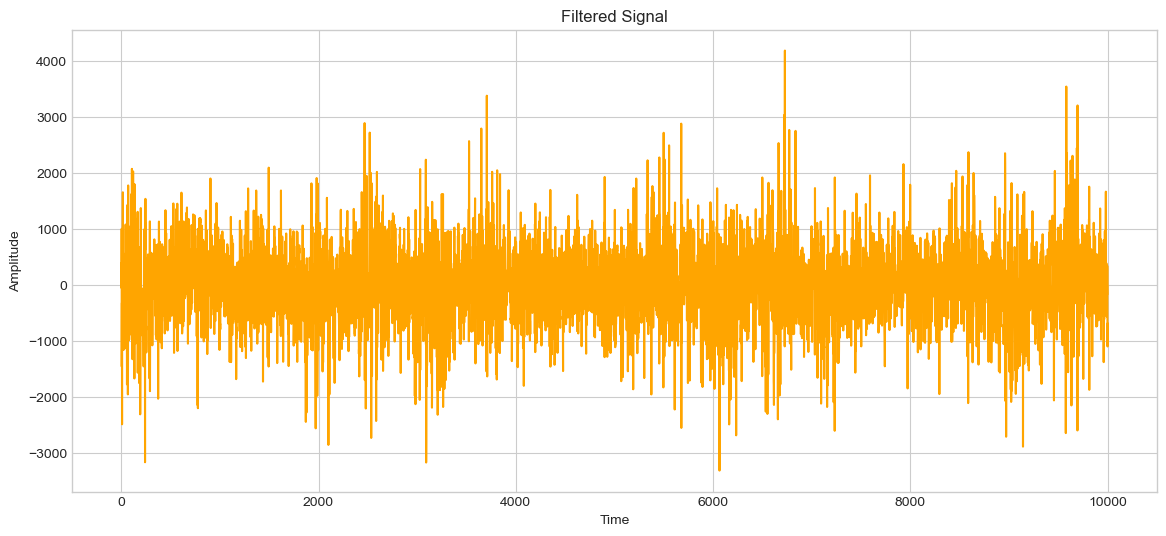

In [26]:
# TODO 1.3 : cleaning the noisy signal using magnitude of FFT

# Wiener filtering
h_filtered = signal.wiener(h_w_noise)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(t, h_filtered, color='orange')
plt.title('Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


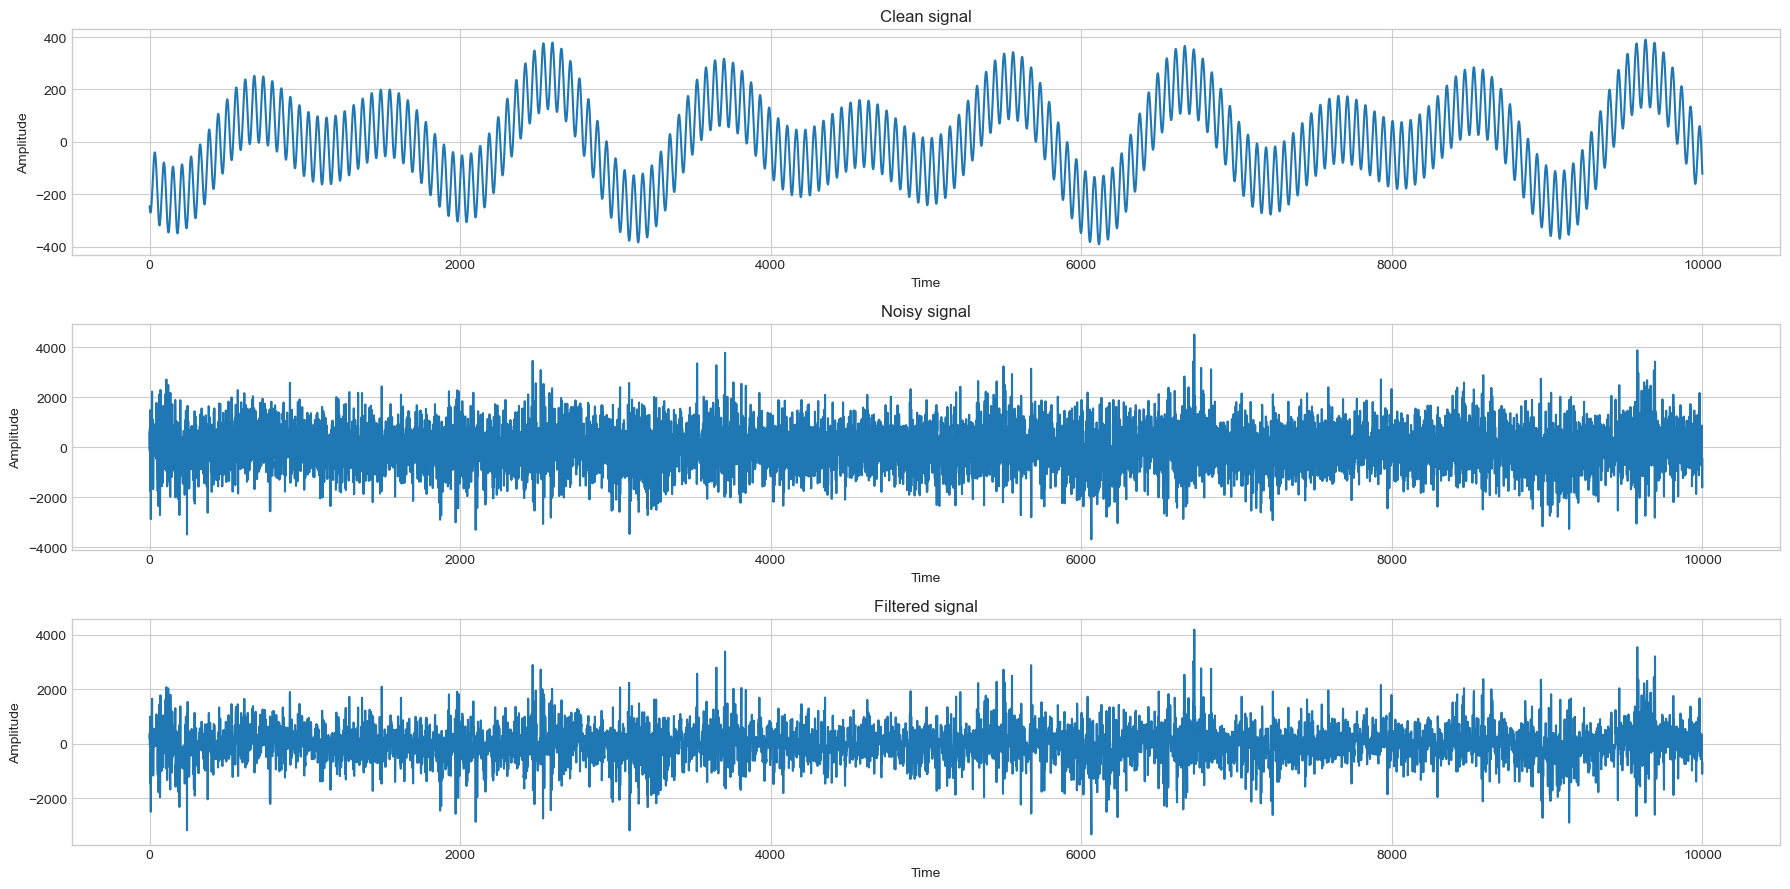

In [7]:
# TODO 1.4 : plot clean signal, noise signal and filtered signal (from your result in TODO 1.3) with label

plt.figure(figsize=(18, 9))

# Clean signal
plt.subplot(3, 1, 1)
plt.plot(t, h)
plt.title('Clean signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

# Noisy signal
plt.subplot(3, 1, 2)
plt.plot(t, h_w_noise)
plt.title('Noisy signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

# Filtered signal
plt.subplot(3, 1, 3)
plt.plot(t, h_filtered)
plt.title('Filtered signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

In [8]:
# TODO 1.5 : export with IPython.display, listen to (1) original signal (2) signal with noise (3) signal after filtered

print("Clean Signal:")
ipd.display(ipd.Audio(data=h, rate=sampling_rate))

print("Noisy Signal:")
ipd.display(ipd.Audio(data=h_w_noise, rate=sampling_rate))

print("Filtered Signal:")
ipd.display(ipd.Audio(data=h_filtered, rate=sampling_rate))


Clean Signal:


Noisy Signal:


Filtered Signal:


In [22]:
# TODO 1.6 : Write to explain and analyze the results

    Answer:
โดยพื้นฐานทั้งสามเสียงจะมี ความถี่ค่อนข้างสูง(เสียงแหลม)
สังเกตได้จากการฟังเสียง และการพิจารณา graph ใน TODO-1.4 
โดยจะสังเกตได้ว่าตั้งแต่ clean signal จะมีความถี่(f)ค่อนข้างมาก/คาบ(T)สั้นๆ

ทำให้ noisy signal และ filtered signal มีพื้นฐานที่สร้างจาก clean signal ทำให้ ความถี่ค่อนข้างสูง(เสียงแหลม) ตามไปด้วย แต่ความรู้สึกเวลาฟังเสียงจะมีความซ่าๆกว่า clean signal โดย noisy signal จะมีความแสบแก้วหู(น่ารำคาญ) กว่า filtered signal ที่จะมีความจางกว่า

## Problem 2 (image FFT)
Download a 1000 x 1000 image ("hamtaro.png") below

<a href="https://ibb.co/kHTjZbb"><img src="https://i.ibb.co/kHTjZbb/hamtaro.png" alt="hamtaro" border="0"></a>

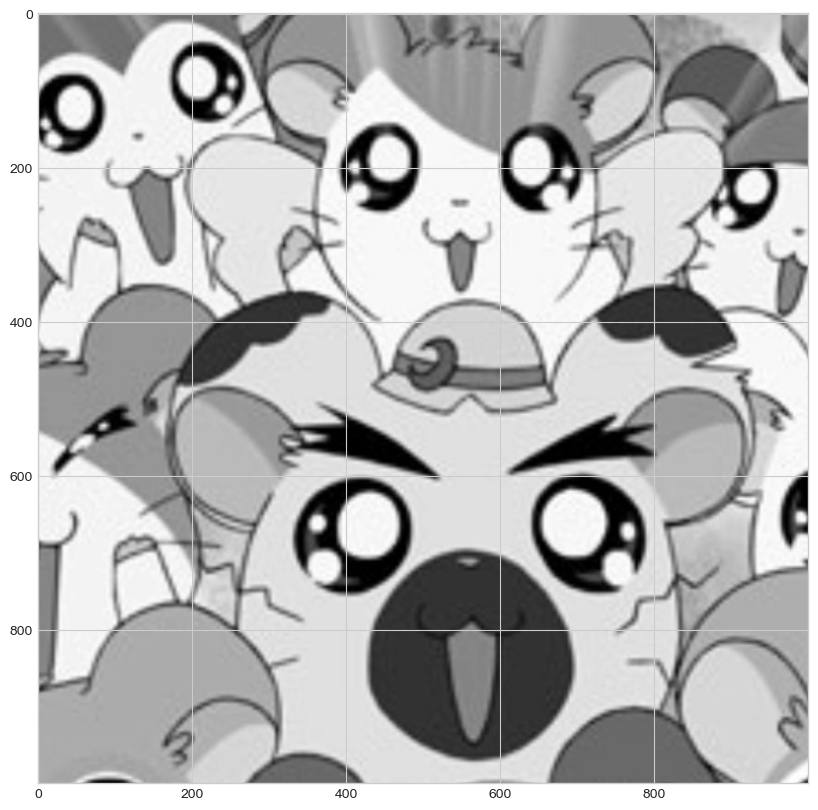

In [10]:
screen_shot = cv2.imread('hamtaro.png',0)

plt.figure(figsize=(10,10))
plt.imshow(screen_shot, cmap='gray')
plt.show()

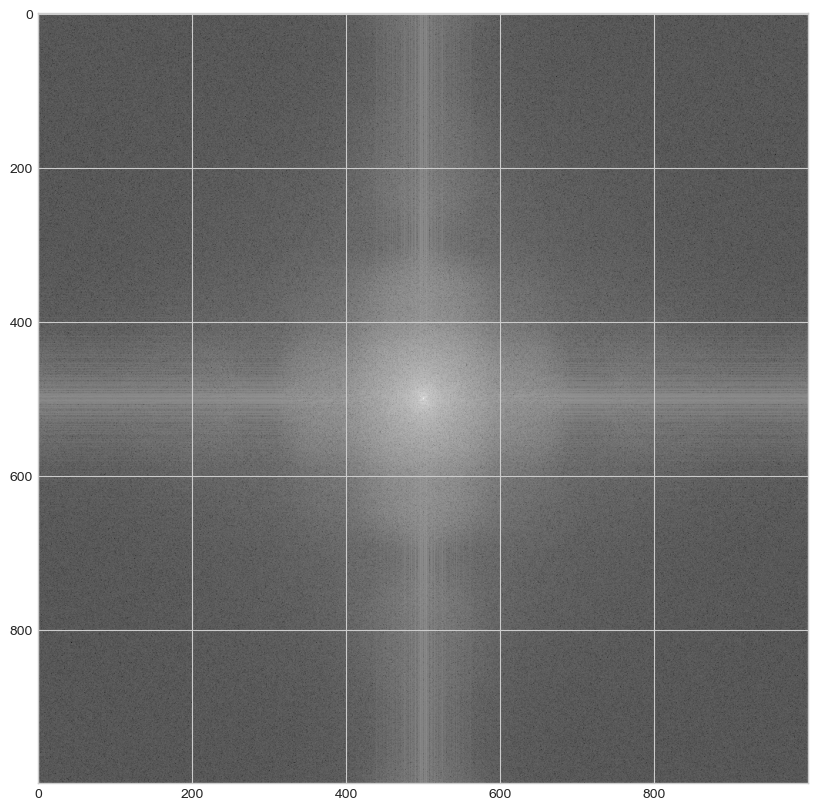

In [11]:
# Apply FFT to the given image
F1 = fftpack.fft2((screen_shot).astype(float))
F2 = fftpack.fftshift(F1) # FFT center zeros freq
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + np.abs(F2))).astype(int), cmap=plt.cm.gray)
plt.show()

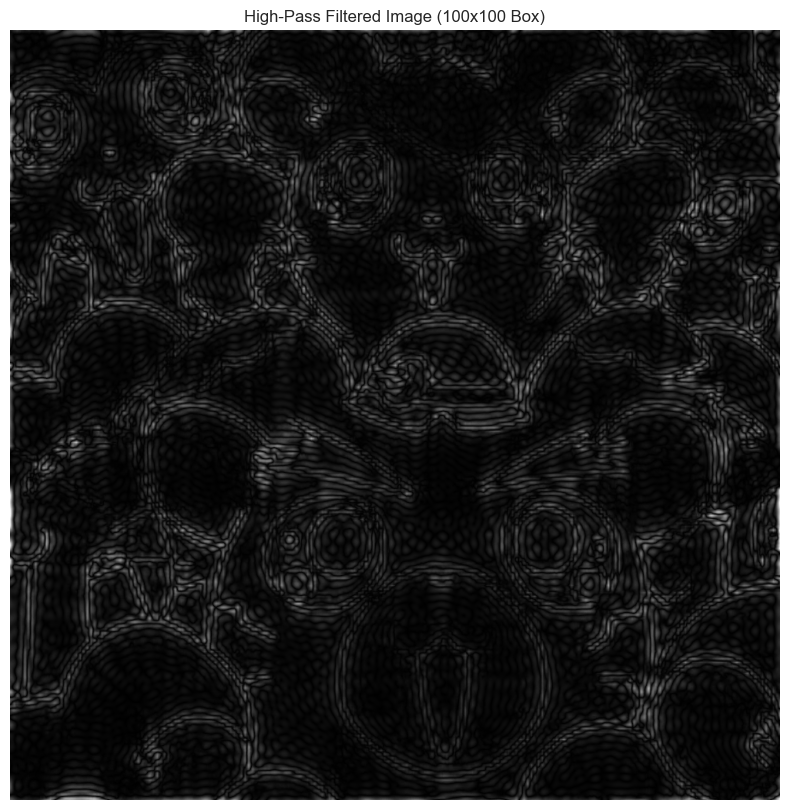

In [12]:
# TODO 2.1 : Implement an ideal high-pass filter with a box size of 100x100 pixels on the given image

rows, cols = screen_shot.shape
# Create a mask
high_pass_mask = np.ones((rows, cols), dtype=np.float32)

# Create a central square of zeros (low-pass removal region)
n = 100  # 100x100 box
center_row, center_col = rows // 2, cols // 2
high_pass_mask[center_row - n//2:center_row + n//2, center_col - n//2:center_col + n//2] = 0

# Apply the filter
F2_filtered = F2 * high_pass_mask

# Perform IFFT Shift and IFFT
F1_filtered = fftpack.ifftshift(F2_filtered)
image_filtered = fftpack.ifft2(F1_filtered)
image_filtered = np.abs(image_filtered)

# Plot
plt.figure(figsize=(10, 10))
plt.imshow(image_filtered, cmap='gray')
plt.title('High-Pass Filtered Image (100x100 Box)')
plt.axis('off')
plt.show()


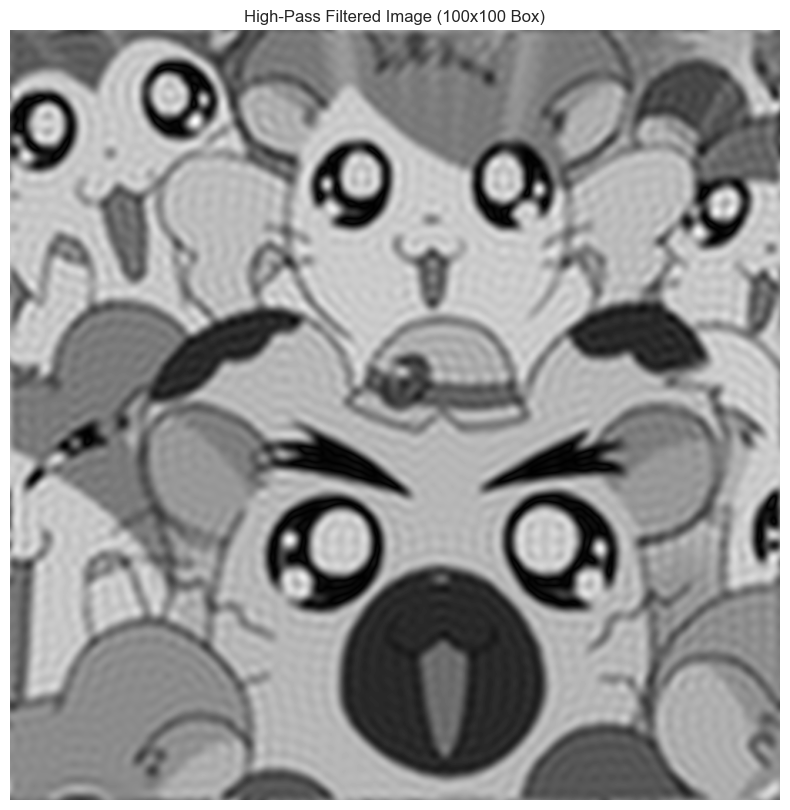

In [13]:
# TODO 2.2 : Implement an ideal low-pass filter with a box size of 100x100 pixels on the given image

rows, cols = screen_shot.shape
# Create a mask
low_pass_mask = np.zeros((rows, cols), dtype=np.float32)

# Create a central square of zeros (low-pass removal region)
n = 100  # 100x100 box
center_row, center_col = rows // 2, cols // 2
low_pass_mask[center_row - n//2:center_row + n//2, center_col - n//2:center_col + n//2] = 1

# Apply the filter
F2_filtered = F2 * low_pass_mask

# Perform IFFT Shift and IFFT
F1_filtered = fftpack.ifftshift(F2_filtered)
image_filtered = fftpack.ifft2(F1_filtered)
image_filtered = np.abs(image_filtered)

# Plot
plt.figure(figsize=(10, 10))
plt.imshow(image_filtered, cmap='gray')
plt.title('High-Pass Filtered Image (100x100 Box)')
plt.axis('off')
plt.show()

## Problem 3

A digital signal can be generated from sampling of an analog signal using a periodic impulse-train. Explain how you can reconstruct an analog signal from a digital signal and aliasing problem does not occur when $f_s \leq 2f_{max} $ using frequency analysis.

where $f_s$ is the sampling frequency and $f_{max} $ is the maximum frequency of the analog signal

HINT :  $ \mathscr{F} \left\{ \sum_{n=-\infty}^{\infty} \delta (t-n T_s) \right\} = \sum_{n=-\infty}^{\infty} \delta(\omega - n\omega_s)$ if $\omega_s = \frac{2\pi}{T_s} = 2\pi f_s$


## Problem 4 : Aliasing

### Problem 4.1

The following code generates two sine waves (x01_ts01 and x02_ts01) which are sampled in a range of t = 0,0.05 with sampling rate = 5000 Hz (f_samp_01). Study and write a report to analyze the results.

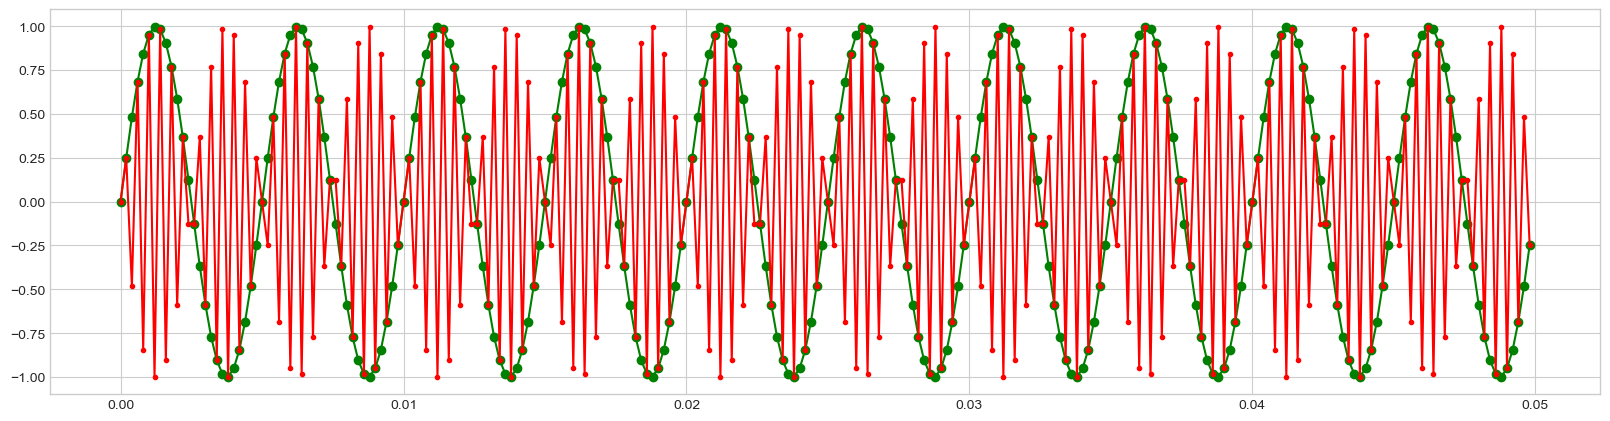

In [14]:
t_st = 0
t_end = 0.05
f_01 = 200
f_02 = 2300

f_samp_01 = 5000

ts01 = np.linspace(t_st, t_end , int((t_end-t_st)*f_samp_01), endpoint=False)
x01_ts01 = np.sin(2*np.pi*f_01*ts01)
x02_ts01 = np.sin(2*np.pi*f_02*ts01)

plt.figure(figsize=(20, 5))
plt.plot(ts01, x01_ts01, 'go-', ts01, x02_ts01, 'r.-')
plt.show()

The sampling rate is reduced to 2500 Hz (f_samp_02). Study and write a report to compare the results.



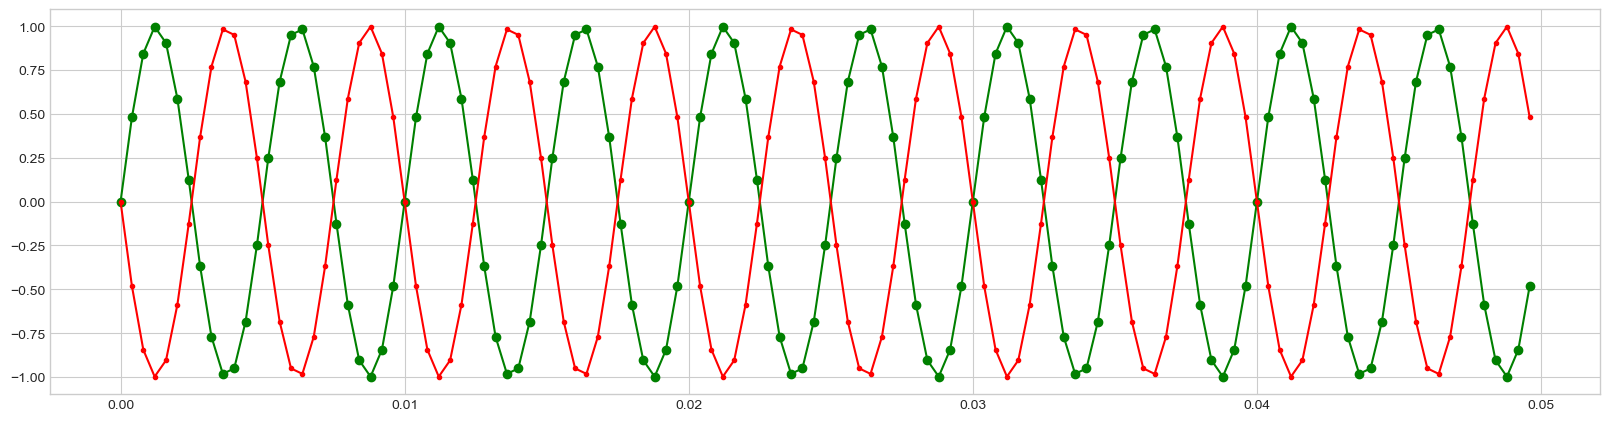

In [15]:
f_samp_02 = 2500
ts02 = np.linspace(t_st, t_end , int((t_end-t_st)*f_samp_02), endpoint=False)
x01_ts02 = np.sin(2*np.pi*f_01*ts02)
x02_ts02 = np.sin(2*np.pi*f_02*ts02)

plt.figure(figsize=(20, 5))
plt.plot(ts02, x01_ts02, 'go-', ts02, x02_ts02, 'r.-')
plt.show()

Ans.

### Problem 4.2
The following code generate audio signals at different frequencies. Play the sound and write a report the analyse the results.

In [16]:
t_st = 0
t_end = 5
f_01 = 50
f_02 = 22050 - f_01
f_03 = 22050 + f_01
f_samp_02 = 22050

ts02 = np.linspace(t_st, t_end , int((t_end-t_st)*f_samp_02), endpoint=False)

# CREATE SIGNAL WITH DIFFERENT FREQ

x01_ts02 = np.sin(2*np.pi*f_01*ts02)
x02_ts02 = np.sin(2*np.pi*f_02*ts02)
x03_ts02 = np.sin(2*np.pi*f_03*ts02)

In [17]:
x02_ts02

array([ 0.        , -0.0142471 , -0.02849132, ...,  0.04272974,
        0.02849132,  0.0142471 ])

In [18]:
ipd.Audio(x01_ts02, rate=f_samp_02)

In [19]:
ipd.Audio(x02_ts02, rate=f_samp_02)

In [20]:
ipd.Audio(x03_ts02, rate=f_samp_02)



<a href="https://imgflip.com/i/4djx2z"><img src="https://i.imgflip.com/4djx2z.jpg" title="made at imgflip.com"/></a><div><a href="https://imgflip.com/memegenerator">from Imgflip Meme Generator</a></div>

###  TODO : write report
Ans:

### Problem 4.3
### why many of audio file use sampling rate 44.1 kHz


Ans:

### Problem 5
Download the 3 audio files and analyze all 3 signals with preliminary analysis.
(HINT : Use a log scale for both frequency and magnitude.)"

1. bass-guitar-single-note --> mixkit-bass-guitar-single-note-2331.wav

explain pattern of signal

In [21]:
# !wget https://raw.githubusercontent.com/Pataweepr/ComEngMath2_2023_resource/master/mixkit-adult-sneeze-2212.wav
# !wget https://raw.githubusercontent.com/Pataweepr/ComEngMath2_2023_resource/master/mixkit-child-deep-breath-2237.wav
# !wget https://raw.githubusercontent.com/Pataweepr/ComEngMath2_2023_resource/master/mixkit-bass-guitar-single-note-2331.wav

--2024-09-24 20:14:24--  https://raw.githubusercontent.com/Pataweepr/ComEngMath2_2023_resource/master/mixkit-adult-sneeze-2212.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8002::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 331094 (323K) [audio/wav]
Saving to: 'mixkit-adult-sneeze-2212.wav'

mixkit-adult-sneeze 100%[===================>] 323.33K  --.-KB/s    in 0.04s   

2024-09-24 20:14:24 (8.08 MB/s) - 'mixkit-adult-sneeze-2212.wav' saved [331094/331094]

--2024-09-24 20:14:24--  https://raw.githubusercontent.com/Pataweepr/ComEngMath2_2023_resource/master/mixkit-child-deep-breath-2237.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8002::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.co